In [1]:
%matplotlib inline
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab 
import scipy.stats as stats
#from dotenv import load_dotenv

In [2]:
#load_dotenv()

In [3]:
#os.getenv("DATASET_PATH")

In [4]:
final_df = pd.read_csv('../all_data/all-data-best-city.csv', index_col=0)

In [5]:
#final_df = pd.read_csv(os.getenv("DATASET_PATH"), index_col=0)

In [6]:
final_df.head()

,city_ascii,cost_live_rent_index,purchase_pow_index,country,mean_tmp,std_dev_temp,safety_index,pollution_index,trffic_min_index,lat,lng
0,Honolulu,80.4,74.4,United States,25.441667,1.837220,52.6,37.0,41.5,21.3294,-157.8460
1,Seattle,83.4,108.4,United States,11.316667,5.142662,45.7,34.7,46.9,47.6211,-122.3244
2,Canberra,69.1,69.1,Australia,13.141667,5.418396,72.0,26.1,43.3,-35.2931,149.1269
3,Adelaide,64.6,67.3,Australia,17.208333,4.416798,66.7,27.1,45.1,-34.9275,138.6000
4,Boston,82.0,106.6,United States,12.063636,8.341855,59.6,32.3,46.5,42.3188,-71.0852


In [7]:
final_df.columns

Index(['city_ascii', 'cost_live_rent_index', 'purchase_pow_index', 'country',
       'mean_tmp', 'std_dev_temp', 'safety_index', 'pollution_index',
       'trffic_min_index', 'lat', 'lng'],
      dtype='object')

In [8]:
#final_df = final_df.drop(['rank_cost_living', 'rank_traffic','rank_safety'], axis=1)
#final_df.head()

In [9]:
"""
# Creating the figure for the 9x9 subplots
fig, axis=plt.subplots(4,2,figsize=(30,30))
axis=axis.flatten()  

# Create the list with the x labels' name for the plot
feature_names=list(final_df.columns)
feature_names.remove('country')
feature_names.remove('city_ascii')
feature_names.remove('lat')
feature_names.remove('lng')

# Loop for scatter plot
for i in range(len(feature_names)):
  axis[i].hist(final_df[feature_names[i]])
  axis[i].set_xlabel(feature_names[i],fontsize='x-large')
  axis[i].set_ylabel("# of cities", fontsize='x-large')
  
# Show the plot
plt.show()
"""

'\n# Creating the figure for the 9x9 subplots\nfig, axis=plt.subplots(4,2,figsize=(30,30))\naxis=axis.flatten()  \n\n# Create the list with the x labels\' name for the plot\nfeature_names=list(final_df.columns)\nfeature_names.remove(\'country\')\nfeature_names.remove(\'city_ascii\')\nfeature_names.remove(\'lat\')\nfeature_names.remove(\'lng\')\n\n# Loop for scatter plot\nfor i in range(len(feature_names)):\n  axis[i].hist(final_df[feature_names[i]])\n  axis[i].set_xlabel(feature_names[i],fontsize=\'x-large\')\n  axis[i].set_ylabel("# of cities", fontsize=\'x-large\')\n  \n# Show the plot\nplt.show()\n'

In [10]:
#plt.savefig("hist-feature-plot.pdf")

In [11]:
"""
stats.probplot(final_df['mean_tmp'], dist="norm", plot=pylab)
pylab.show()
"""

'\nstats.probplot(final_df[\'mean_tmp\'], dist="norm", plot=pylab)\npylab.show()\n'

In [12]:
# Define variables for best mean temperature and best std deviation value
best_mean_tmp = 15
best_std_dev_tmp = 10

In [13]:
"""
# Testing for temperature 
final_df['mean_tmp_diff_from_best'] = abs(best_mean_tmp - final_df['mean_tmp'])
final_df['tmp_std_dev_diff_from_best'] = abs(best_std_dev_tmp - final_df['std_dev_temp'])

final_df.head()
"""

"\n# Testing for temperature \nfinal_df['mean_tmp_diff_from_best'] = abs(best_mean_tmp - final_df['mean_tmp'])\nfinal_df['tmp_std_dev_diff_from_best'] = abs(best_std_dev_tmp - final_df['std_dev_temp'])\n\nfinal_df.head()\n"

In [14]:
final_df.columns

Index(['city_ascii', 'cost_live_rent_index', 'purchase_pow_index', 'country',
       'mean_tmp', 'std_dev_temp', 'safety_index', 'pollution_index',
       'trffic_min_index', 'lat', 'lng'],
      dtype='object')

In [15]:
# Min-Max Scaling all our indexes
final_df['scaled_cost_live_rent_index'] = 1 - ( (final_df['cost_live_rent_index'] - final_df['cost_live_rent_index'].min()) /
                                           (final_df['cost_live_rent_index'].max() - final_df['cost_live_rent_index'].min()) )
final_df['scaled_purchase_pow_index'] = ( (final_df['purchase_pow_index'] - final_df['purchase_pow_index'].min()) /
                                           (final_df['purchase_pow_index'].max() - final_df['purchase_pow_index'].min()) )
final_df['scaled_safety_index'] = ( (final_df['safety_index'] - final_df['safety_index'].min()) /
                                           (final_df['safety_index'].max() - final_df['safety_index'].min()) )
final_df['scaled_pollution_index'] = 1 - ( (final_df['pollution_index'] - final_df['pollution_index'].min()) /
                                           (final_df['pollution_index'].max() - final_df['pollution_index'].min()) )
final_df['scaled_trffic_min_index'] = 1 - ( (final_df['trffic_min_index'] - final_df['trffic_min_index'].min()) /
                                           (final_df['trffic_min_index'].max() - final_df['trffic_min_index'].min()) )
final_df['scaled_mean_tmp'] = ( (final_df['mean_tmp'] - final_df['mean_tmp'].min()) /
                                           (final_df['mean_tmp'].max() - final_df['mean_tmp'].min()) )
final_df['scaled_tmp_std_dev'] = ( (final_df['std_dev_temp'] - final_df['std_dev_temp'].min()) /
                                           (final_df['std_dev_temp'].max() - final_df['std_dev_temp'].min()) )

final_df = final_df.drop(['cost_live_rent_index', 'purchase_pow_index', 'safety_index', 'pollution_index',
                          'trffic_min_index'],
                         axis=1)
final_df.head()

,city_ascii,country,mean_tmp,std_dev_temp,lat,lng,scaled_cost_live_rent_index,scaled_purchase_pow_index,scaled_safety_index,scaled_pollution_index,scaled_trffic_min_index,scaled_mean_tmp,scaled_tmp_std_dev
0,Honolulu,United States,25.441667,1.837220,21.3294,-157.8460,0.119138,0.464207,0.517190,0.730670,0.551064,0.837757,0.145254
1,Seattle,United States,11.316667,5.142662,47.6211,-122.3244,0.081115,0.715129,0.414051,0.760309,0.436170,0.112158,0.479235
2,Canberra,Australia,13.141667,5.418396,-35.2931,149.1269,0.262357,0.425092,0.807175,0.871134,0.512766,0.205908,0.507095
3,Adelaide,Australia,17.208333,4.416798,-34.9275,138.6000,0.319392,0.411808,0.727952,0.858247,0.474468,0.414812,0.405894
4,Boston,United States,12.063636,8.341855,42.3188,-71.0852,0.098859,0.701845,0.621824,0.791237,0.444681,0.150529,0.802480


In [16]:
final_df.describe()

,mean_tmp,std_dev_temp,lat,lng,scaled_cost_live_rent_index,scaled_purchase_pow_index,scaled_safety_index,scaled_pollution_index,scaled_trffic_min_index,scaled_mean_tmp,scaled_tmp_std_dev
count,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000
mean,16.929022,5.456515,26.269406,6.210760,0.570639,0.418397,0.553281,0.540156,0.613195,0.400463,0.510946
std,5.668299,2.354963,28.471539,79.900214,0.238457,0.238509,0.224254,0.270383,0.194713,0.291180,0.237944
min,9.133333,0.399621,-41.288900,-157.846000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.051894,3.910059,19.344000,-71.704325,0.374842,0.183948,0.414051,0.338918,0.501596,0.149926,0.354693
50%,15.822500,5.658067,36.896650,16.177900,0.631179,0.432472,0.546338,0.553479,0.627660,0.343622,0.531311
75%,20.875000,7.495350,45.477400,50.223625,0.777250,0.603321,0.732063,0.776740,0.764894,0.603168,0.716949
max,28.600000,10.296734,59.950000,174.777200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

In [18]:
# prep data
train_df = final_df.drop(['mean_tmp','std_dev_temp','lat','lng','country'],axis=1)
train_df = train_df.set_index('city_ascii')
train_df.head()

,scaled_cost_live_rent_index,scaled_purchase_pow_index,scaled_safety_index,scaled_pollution_index,scaled_trffic_min_index,scaled_mean_tmp,scaled_tmp_std_dev
city_ascii,,,,,,,
Honolulu,0.119138,0.464207,0.517190,0.730670,0.551064,0.837757,0.145254
Seattle,0.081115,0.715129,0.414051,0.760309,0.436170,0.112158,0.479235
Canberra,0.262357,0.425092,0.807175,0.871134,0.512766,0.205908,0.507095
Adelaide,0.319392,0.411808,0.727952,0.858247,0.474468,0.414812,0.405894
Boston,0.098859,0.701845,0.621824,0.791237,0.444681,0.150529,0.802480


In [19]:
train_df.columns

Index(['scaled_cost_live_rent_index', 'scaled_purchase_pow_index',
       'scaled_safety_index', 'scaled_pollution_index',
       'scaled_trffic_min_index', 'scaled_mean_tmp', 'scaled_tmp_std_dev'],
      dtype='object')

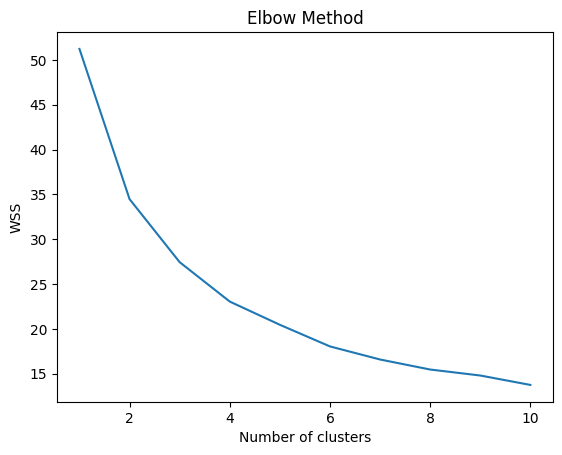

In [20]:
# Specify the columns you want to include
columns = ['scaled_cost_live_rent_index', 'scaled_purchase_pow_index', 'scaled_safety_index',
          'scaled_pollution_index','scaled_trffic_min_index','scaled_mean_tmp',
           'scaled_tmp_std_dev']  # replace with your column names

# Select only these columns from the DataFrame
selected_df = train_df[columns]

# Convert DataFrame to NumPy array
data = selected_df.values

# Calculate the Within-Cluster-Sum of Squared Errors (WSS) for different values of k
wss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data)
    wss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.plot(range(1, 11), wss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WSS')
plt.show()


In [21]:
"""
from sklearn.decomposition import PCA

# Assuming train_df is your DataFrame
data = train_df.values

# Perform PCA
pca = PCA(n_components=7)
X_pca = pca.fit_transform(data)

# Calculate the explained variance for each principal component
explained_variance = pca.explained_variance_ratio_

# Plot the explained variance
plt.figure(figsize=(8, 6))
plt.bar(range(7), explained_variance, alpha=0.5, align='center', label='individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
"""

"\nfrom sklearn.decomposition import PCA\n\n# Assuming train_df is your DataFrame\ndata = train_df.values\n\n# Perform PCA\npca = PCA(n_components=7)\nX_pca = pca.fit_transform(data)\n\n# Calculate the explained variance for each principal component\nexplained_variance = pca.explained_variance_ratio_\n\n# Plot the explained variance\nplt.figure(figsize=(8, 6))\nplt.bar(range(7), explained_variance, alpha=0.5, align='center', label='individual explained variance')\nplt.ylabel('Explained variance ratio')\nplt.xlabel('Principal components')\nplt.legend(loc='best')\nplt.tight_layout()\n"

#### K=5 (5 clusters) seems to be the best choice based on the elbow method and the explained variance with PCA.
#### Note that this might change based on the best temp values selected by the user
#### Testing with extreme and average values of the temperature with controlled weights
#### Best temp 40, std dev 20

In [22]:
train_df.columns

Index(['scaled_cost_live_rent_index', 'scaled_purchase_pow_index',
       'scaled_safety_index', 'scaled_pollution_index',
       'scaled_trffic_min_index', 'scaled_mean_tmp', 'scaled_tmp_std_dev'],
      dtype='object')

In [23]:
print("Range of Mean temperature:",final_df['mean_tmp'].max(), final_df['mean_tmp'].min())
print("Range of Std Dev of Temperature:",final_df['std_dev_temp'].max(), final_df['std_dev_temp'].min())

mean_tmp_range = final_df['mean_tmp'].max() - final_df['mean_tmp'].min()
std_dev_temp_range = final_df['std_dev_temp'].max() - final_df['std_dev_temp'].min()

scaled_best_mean_tmp = (best_mean_tmp - final_df['mean_tmp'].min()) / mean_tmp_range
sclaed_best_std_dev_tmp = (best_std_dev_tmp - final_df['std_dev_temp'].min()) / std_dev_temp_range

Range of Mean temperature: 28.600000000000005 9.133333333333336
Range of Std Dev of Temperature: 10.296733815765428 0.3996210326008498


In [24]:
# Convert DataFrame to NumPy array
data = train_df.values

# Run K-Means clustering
k = 3
kmeans = KMeans(n_clusters=k).fit(data)

# For a new point
new_point = np.array([[2/5,2/5,2/5,2/5,2/5,scaled_best_mean_tmp,sclaed_best_std_dev_tmp]])

# Find the cluster for the new point
new_point_label = kmeans.predict(new_point)

# Get all points from this cluster
points_in_cluster = data[np.where(kmeans.labels_ == new_point_label[0])]

# Find the closest points
distances = np.linalg.norm(points_in_cluster - new_point, axis=1)
closest_points = points_in_cluster[np.argsort(distances)[:10]]


In [25]:
#print(closest_points)

In [26]:
mask = train_df.apply(lambda row: row.values in closest_points, axis=1)
closest_df = train_df[mask]
closest_df.head()

,scaled_cost_live_rent_index,scaled_purchase_pow_index,scaled_safety_index,scaled_pollution_index,scaled_trffic_min_index,scaled_mean_tmp,scaled_tmp_std_dev
city_ascii,,,,,,,
Miami,0.171103,0.535055,0.428999,0.702320,0.517021,0.812500,0.291155
Minneapolis,0.352345,0.733579,0.391629,0.838918,0.646809,0.195205,0.827358
Atlanta,0.309252,0.802952,0.272048,0.631443,0.555319,0.405822,0.720729
Paris,0.372624,0.477491,0.363229,0.387887,0.555319,0.163955,0.545733
Seoul,0.441065,0.514391,0.857997,0.448454,0.536170,0.244396,0.905856


In [27]:
#print(new_point, new_point_label)

In [28]:
print(closest_df.shape)

(17, 7)


In [29]:
#closest_df.head(10)

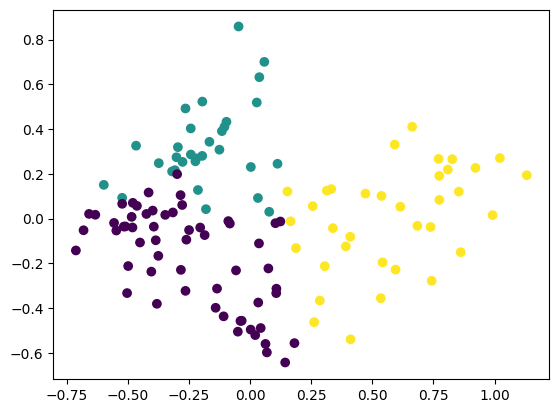

In [30]:
# Evaluating k means labels with PCA
from sklearn.decomposition import PCA

labels = kmeans.labels_

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data)

plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels)
plt.show()

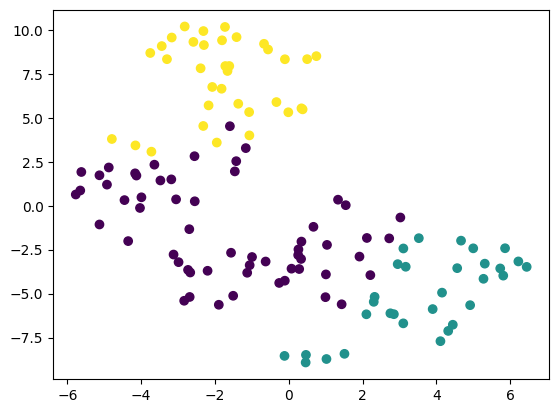

In [31]:
# Evaluating k means labels with tsne
from sklearn.manifold import TSNE

labels = kmeans.labels_

tsne = TSNE(n_components=2)
reduced_data = tsne.fit_transform(data)

plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels)
plt.show()

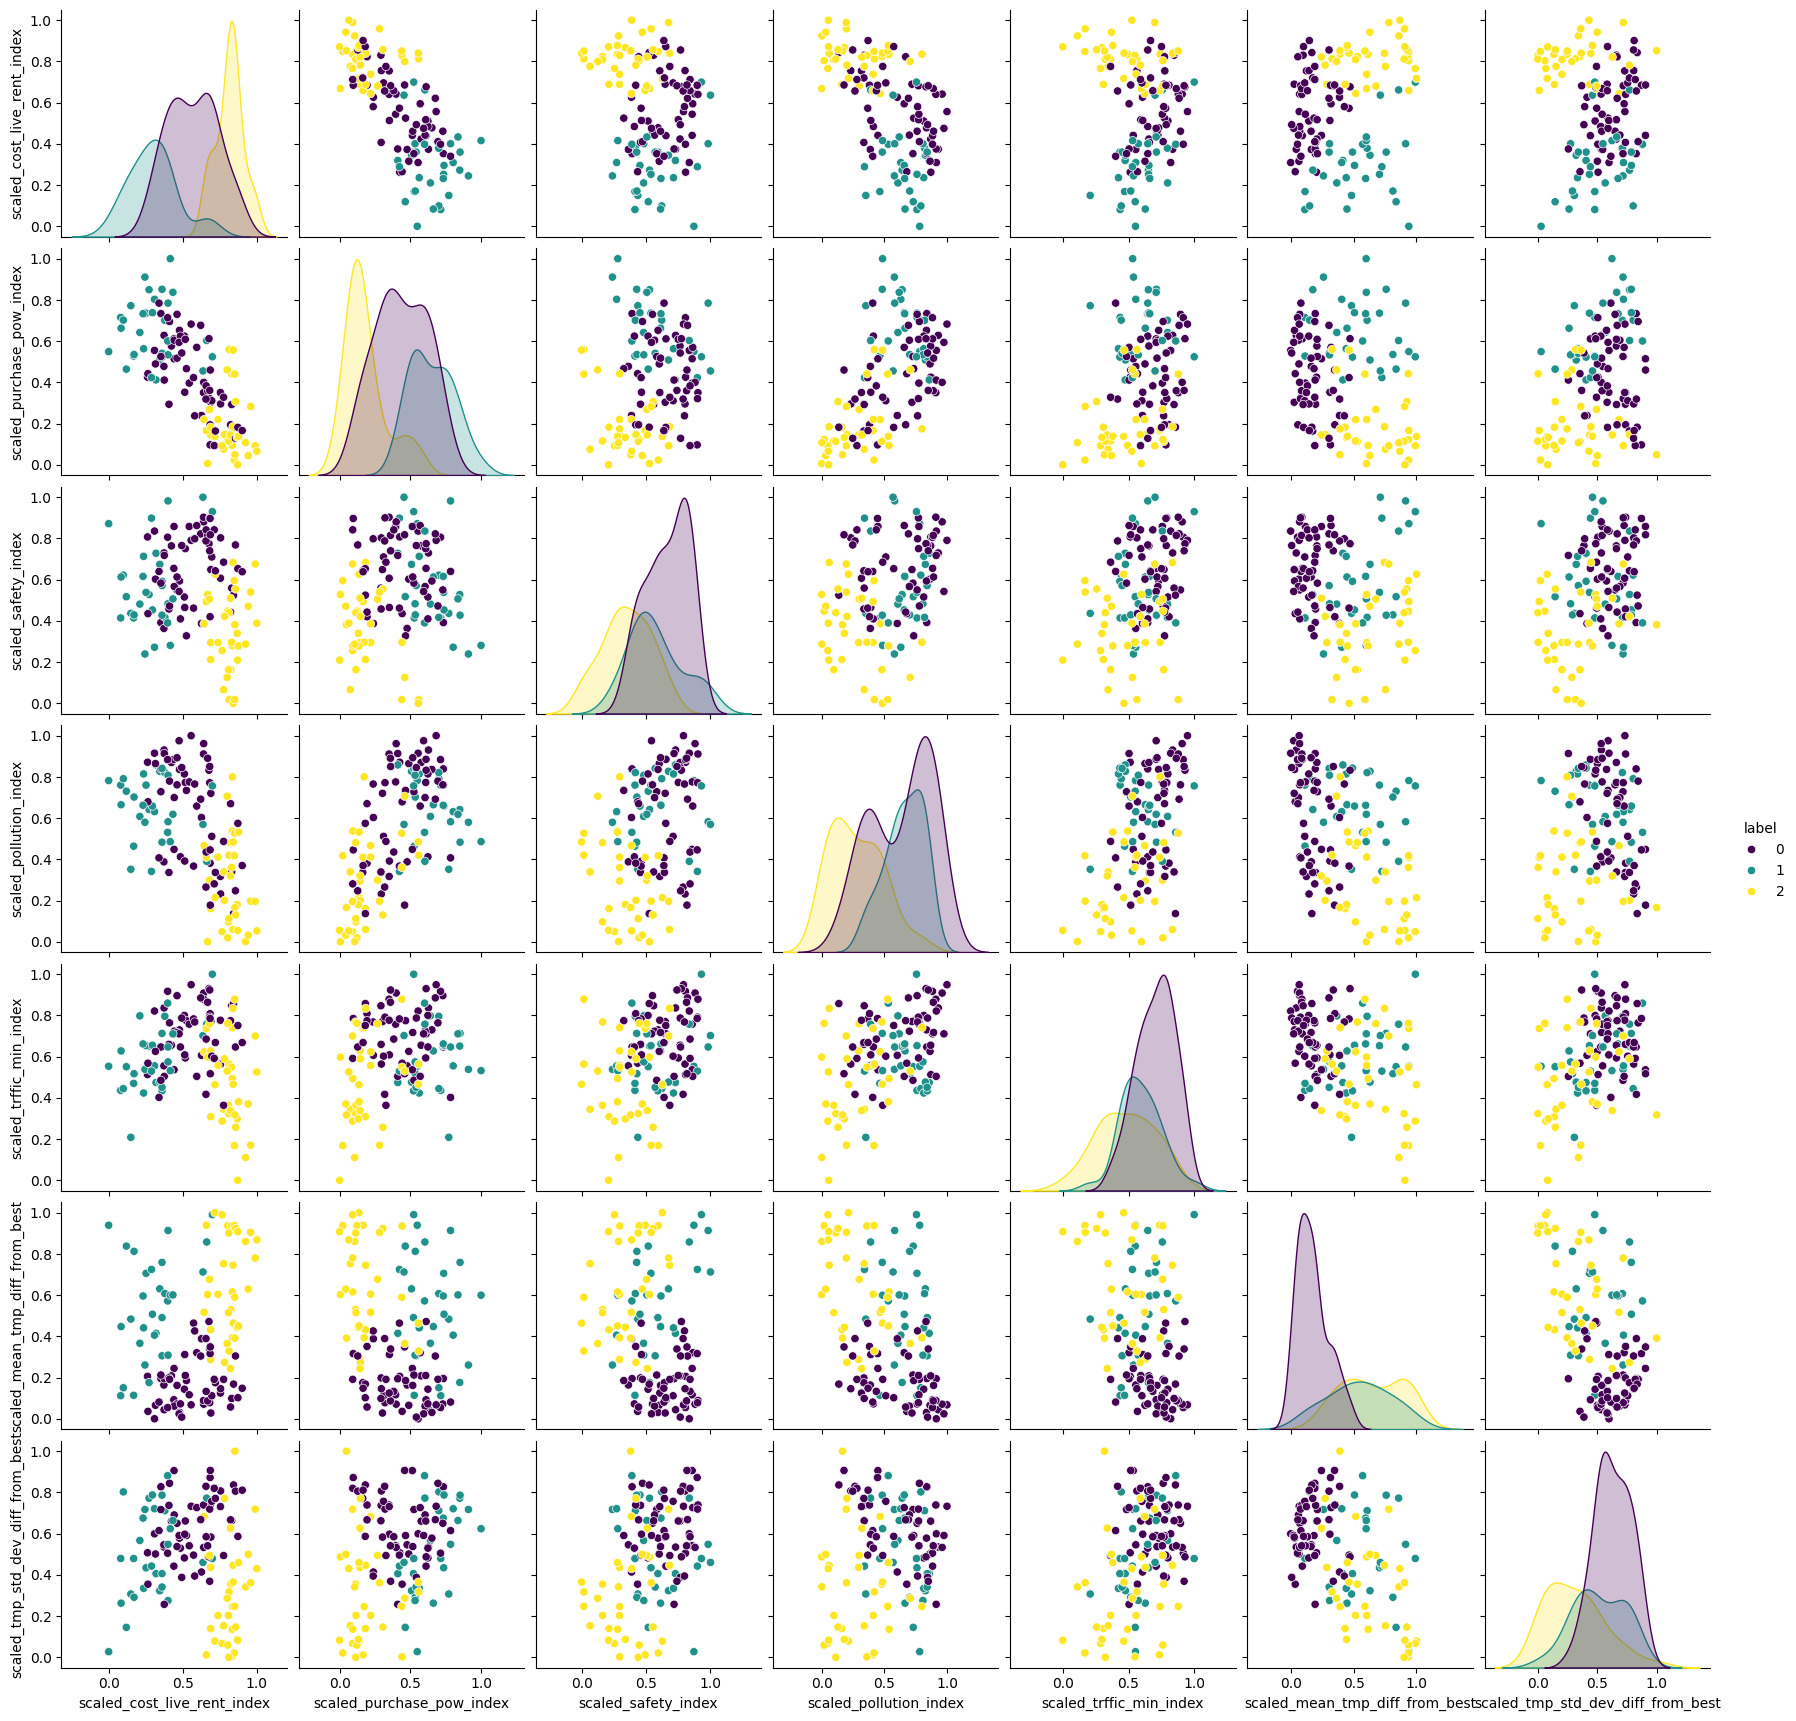

In [32]:
import seaborn as sns

# Assuming X is your seven dimensional data and kmeans.labels_ are your cluster labels
df = pd.DataFrame(data, columns=['scaled_cost_live_rent_index', 'scaled_purchase_pow_index','scaled_safety_index', 
                                 'scaled_pollution_index','scaled_trffic_min_index', 'scaled_mean_tmp_diff_from_best',
                                 'scaled_tmp_std_dev_diff_from_best'])
df['label'] = kmeans.labels_

# Pairplot using seaborn
sns.pairplot(df, hue='label', palette='viridis')
plt.show()


In [33]:
from sklearn.metrics import silhouette_score
labels = kmeans.labels_
silhouette_avg = silhouette_score(data, labels)

print(f"For n_clusters = {k}, the average silhouette_score is : {silhouette_avg}")

For n_clusters = 3, the average silhouette_score is : 0.23480324096635086


### Trying out other clustering algorithms.

In [34]:
from sklearn.cluster import DBSCAN

# Define the parameter range
eps_values = np.arange(0.5, 0.8, 0.01)  # Adjust as needed
min_samples_values = range(25, 35, 1)  # Adjust as needed

best_eps = None
best_min_samples = None
best_score = -1

# Perform grid search
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan.fit(data)
        labels = dbscan.labels_

        # Calculate silhouette score only for cases where there are more than 1 cluster
        if len(set(labels)) > 1:
            score = silhouette_score(data, labels)
            if score > best_score:
                best_eps = eps
                best_min_samples = min_samples
                best_score = score

print(f'Best eps: {best_eps}, Best min_samples: {best_min_samples}, Best silhouette score: {best_score}')

dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
dbscan.fit(data)

Best eps: 0.6200000000000001, Best min_samples: 29, Best silhouette score: 0.31126432728841125


DBSCAN(eps=0.6200000000000001, min_samples=29)

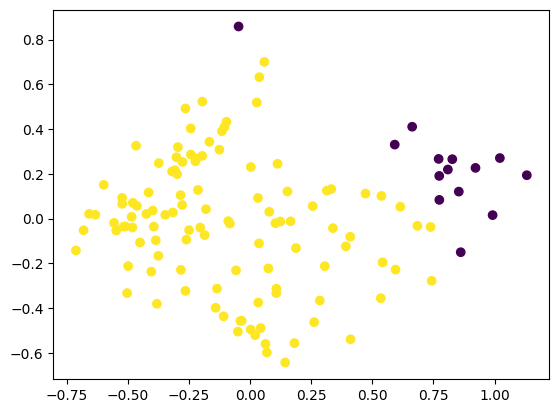

In [35]:
# Evaluating k means labels with PCA
from sklearn.decomposition import PCA

labels = dbscan.labels_

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data)

plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels)
plt.show()

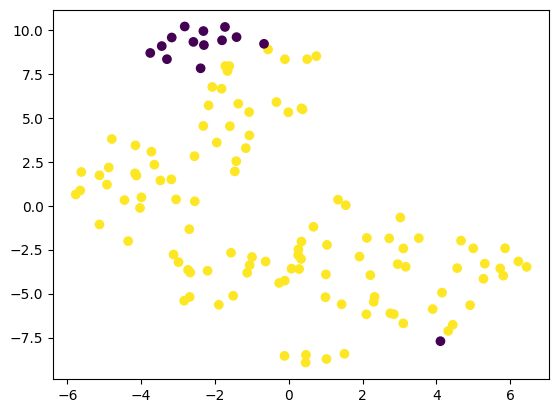

In [36]:
# Evaluating DBSCAN labels with tsne
from sklearn.manifold import TSNE

labels = dbscan.labels_

tsne = TSNE(n_components=2)
reduced_data = tsne.fit_transform(data)

plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels)
plt.show()

In [37]:
from sklearn.cluster import Birch

# Define the parameter range
threshold_values = np.arange(0.1, 0.5, 0.01)  # Adjust as needed
branching_factor_values = range(15, 40, 1)  # Adjust as needed

best_threshold = None
best_branching_factor = None
best_score = -1

# Perform grid search
for threshold in threshold_values:
    for branching_factor in branching_factor_values:
        birch = Birch(threshold=threshold, branching_factor=branching_factor)
        birch.fit(data)
        labels = birch.labels_

        # Calculate silhouette score only for cases where there are more than 1 cluster
        if len(set(labels)) > 1:
            score = silhouette_score(data, labels)
            if score > best_score:
                best_threshold = threshold
                best_branching_factor = branching_factor
                best_score = score

print(f'Best threshold: {best_threshold}, Best branching factor: {best_branching_factor}, Best silhouette score: {best_score}')

birch = Birch(threshold=best_threshold, branching_factor=best_branching_factor)
birch.fit(data)

Best threshold: 0.44999999999999984, Best branching factor: 15, Best silhouette score: 0.25863995599633477


Birch(branching_factor=15, threshold=0.44999999999999984)

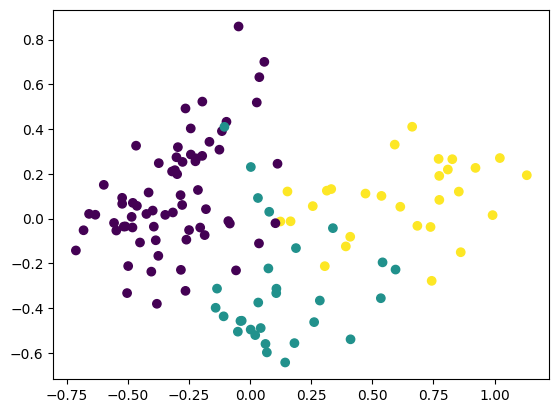

In [38]:
# Evaluating BIRCH labels with PCA
from sklearn.decomposition import PCA

labels = birch.labels_

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data)

plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels)
plt.show()

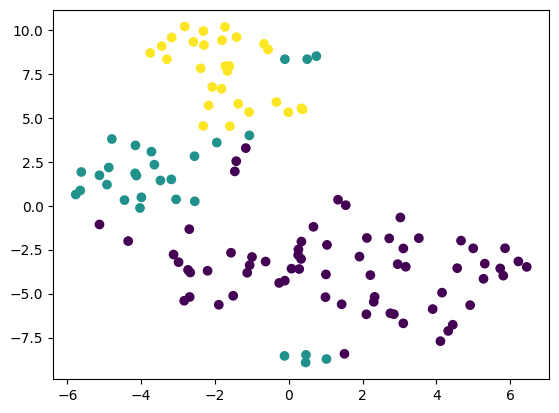

In [39]:
# Evaluating BIRCH labels with tsne
from sklearn.manifold import TSNE

labels = birch.labels_

tsne = TSNE(n_components=2)
reduced_data = tsne.fit_transform(data)

plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels)
plt.show()